<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align = 'center'> K-Vecinos-Más-Cercanos (KNN) </h2>

<h2> Introducción </h2>

El algoritmo de los k vecinos más cercanos (KNN, por sus siglas en inglés) es una técnica fundamental en el ámbito del aprendizaje automático supervisado, especialmente en problemas de clasificación y regresión. Su principio se basa en la idea intuitiva de que los puntos de datos similares tienden a agruparse en el mismo espacio. KNN asigna una etiqueta a un punto de datos desconocido basándose en la mayoría de las etiquetas de sus vecinos más cercanos, donde la cercanía se define generalmente mediante una métrica de distancia, como la distancia euclidiana. Es un algoritmo simple pero poderoso, que no requiere entrenamiento explícito y puede adaptarse fácilmente a diferentes tipos de datos y problemas. Sin embargo, su eficacia puede depender significativamente de la elección adecuada del parámetro k y de la representación adecuada de los datos.

Esta técnica se basa en la idea de que un individuo pertenece a una clase (en el caso de clasificación) o tiene una variable numérica (en el caso de regresión) similar a individuos que cuentan con características similares (variables independientes). El siguiente gráfico muestra este principio:

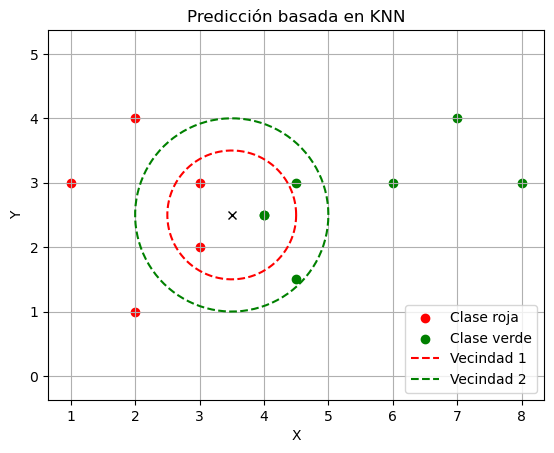

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

x1 = [2,3,3,2,1]
y1 = [1,2,3,4,3]

x2 = [4, 4, 8,7,6, 4.5, 4.5]
#x2 = [5 + i for i in x1]
y2 = [2.5,2.5,3,4,3, 3, 1.5]

plt.scatter(x1, y1, color='red', label='Clase roja')
plt.scatter(x2, y2, color='green', label='Clase verde')

# Define the angle range for drawing the circle
theta = np.linspace(0, 2*np.pi, 100)

# Define the circle's radius
radius = 1

# Calculate x and y coordinates of the circle
x = 3.5 + radius * np.cos(theta)
y = 2.5 + radius * np.sin(theta)

plt.plot([3.5], [2.5], 'x', color='black')

# Create the plot
plt.plot(x, y, 'k--', color='red',label='Vecindad 1')  # 'k--' means black dashed lines
plt.axis('equal')  # Equal aspect ratio ensures the circle looks like a circle
plt.title('Predicción basada en KNN')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

c_x2 = 3.5 + (radius + 0.5) * np.cos(theta)
c_y2 = 2.5 + (radius + 0.5)* np.sin(theta)

plt.plot(c_x2, c_y2, 'k--', color='green', label='Vecindad 2')

plt.legend()
#plt.annotate(text='k = 3', xy=(4,4), fontsize=15)
plt.show()

Supongamos que nos enfrentamos al problema de clasificación de decidir si la observación denotada por "x" pertenece a la clase roja o a la clase verde y queremos emplear el algoritmo de KNN para determinar su clase. Para ello, decidimos que clasificaremos este dato según las 3 observaciones más cercanas, en cuyo caso obtenemos la vecindad 1, lo que nos da una predicción de "rojo". Sin embargo, podemos incrementar el número de elementos cercanos a considerar; si escogemos los 5 vecinos más cercanos, ahora la categoría predicha será "verde".

<h2> Modelo matemático </h2>

Considere el siguiente conjunto de datos:

$$D = \left\{ \left( \mathbf{x}_1, y_{1} \right), \left( \mathbf{x}_2, y_{2} \right), ... , \left( \mathbf{x}_n, y_{n} \right) \right\}$$

en dónde $\mathbf{x}_{i} \in R^{k}$ es el vector de características del individuo $i$. Sea $d(a, b)$ una métrica de distancia entre el punto $a$ y el punto $b$, $\mathbf{x}_{p}$ el vector de características del individuo $p$ cuya variable $y_{p}$ queremos predecir. Así, tenemos el arreglo $\left\{ \left( \mathbf{x}^{(1)}, y^{(1)} \right), \left( \mathbf{x}^{(2)}, y^{(2)} \right), ... , \left( \mathbf{x}^{(n)}, y^{(n)} \right) \right\}$, tal que

$$d\left( \mathbf{x}^{(1)}, \mathbf{x}_{p} \right) \leq d\left( \mathbf{x}^{(2)}, \mathbf{x}_{p} \right) \leq \cdots \leq d\left( \mathbf{x}^{(n)}, \mathbf{x}_{p} \right)$$

Finalmente escogemos los valores $y^{(j)}$, $j \in [1, k] $, para un $k$ dado. Para el ejercicio de clasificación prediciremos el valor $y$ como el valor más frecuente de los $y^{(j)}$, para el problema de regresión predecimos su promedio.

<h2> Métricas de distancia </h2>

<h3> Distancia Euclideana </h3> 

La distancia euclidiana entre dos puntos $\mathbf{x}_{1} = \left(x_{11}, x_{12}, ..., x_{1k} \right)$ y $\mathbf{x}_{2} = \left(x_{21}, x_{22}, ..., x_{2k} \right)$ en un espacio n-dimensional se puede calcular utilizando la fórmula:

$$ d(\mathbf{x}_{1}, \mathbf{x}_2) = \sqrt{\sum_{i}^{k} \left( x_{1i} - x_{2i}\right)^{2}}$$

Esta fórmula se deriva directamente del teorema de Pitágoras aplicado a un triángulo rectángulo formado por los dos puntos y el origen del sistema de coordenadas. En un espacio tridimensional, la fórmula se extiende de manera similar y se generaliza para espacios de dimensiones superiores.

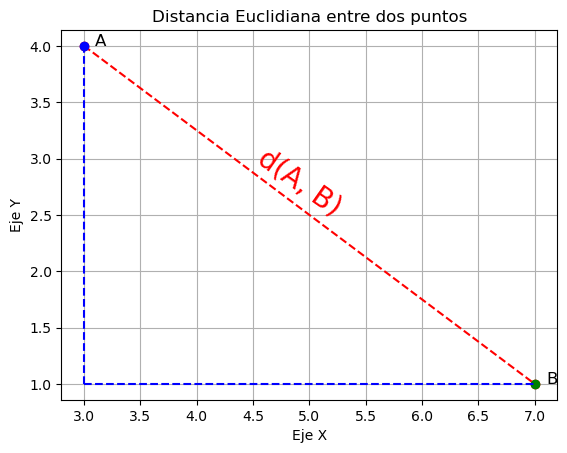

La distancia euclidiana entre los puntos [3, 4] y [7, 1] es: 5.0


In [123]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')

# Puntos de ejemplo
point_a = [[3, 4]]
point_b = [[7, 1]]

# Calcular distancia euclidiana
distance = dist.pairwise(point_a, point_b)

# Crear el gráfico
plt.figure()
plt.plot([point_a[0][0], point_b[0][0]], [point_a[0][1], point_b[0][1]], 'ro--')
plt.plot(point_a[0][0], point_a[0][1], 'bo')  # Punto A en azul
plt.plot(point_b[0][0], point_b[0][1], 'go')  # Punto B en verde

plt.plot([point_a[0][0], point_b[0][0]], [point_b[0][1], point_b[0][1]], 'b--')
plt.plot([point_a[0][0], point_a[0][0]], [point_b[0][1], point_a[0][1]], 'b--')
plt.annotate('d(A, B)', xy=(4.5, 2.5), rotation=-35, fontsize=20, color='red')

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Distancia Euclidiana entre dos puntos')
plt.text(point_a[0][0] + 0.1, point_a[0][1], 'A', fontsize=12)
plt.text(point_b[0][0] + 0.1, point_b[0][1], 'B', fontsize=12)
plt.grid(True)
plt.axis('equal')  # Establecer los ejes en la misma escala
plt.show()

print("La distancia euclidiana entre los puntos", point_a[0], "y", point_b[0], "es:", distance[0][0])

<h3> Distancia de Manhattan </h3>

La distancia de Manhattan entre dos puntos $\mathbf{x}_{1} = \left(x_{11}, x_{12}, ..., x_{1k} \right)$ y $\mathbf{x}_{2} = \left(x_{21}, x_{22}, ..., x_{2k} \right)$ en un espacio n-dimensional se puede calcular utilizando la fórmula:

$$ d(\mathbf{x}_{1}, \mathbf{x}_2) = \sum_{i}^{k} \vert  x_{1i} - x_{2i} \vert$$

Esta fórmula corresponde a las distancias absolutas de las respectivas posiciones cartesianas.

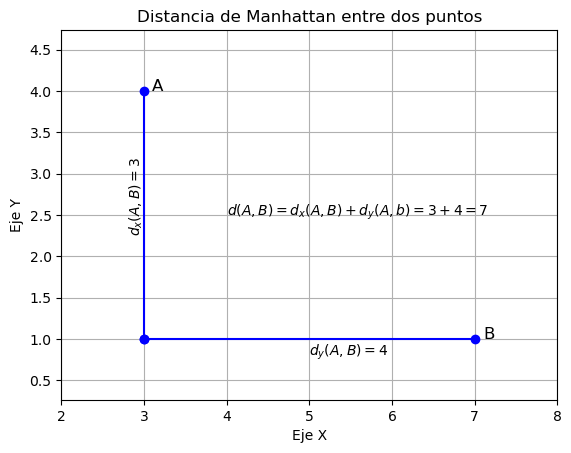

La distancia euclidiana entre los puntos [3, 4] y [7, 1] es: 7.0


In [180]:
import math
import matplotlib.pyplot as plt
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('manhattan')

# Puntos de ejemplo
point_a = [[3, 4]]
point_b = [[7, 1]]

# Calcular distancia de manhattan
distance = dist.pairwise(point_a, point_b)

plt.figure()
for i in range(len(points) - 1):
    plt.plot([points[i][0], points[i + 1][0]], [points[i][1], points[i + 1][1]], 'bo-')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Distancia de Manhattan entre dos puntos')
plt.grid(True)
plt.axis('equal')
plt.text(point_a[0][0] + 0.1, point_a[0][1], 'A', fontsize=12)
plt.text(point_b[0][0] + 0.1, point_b[0][1], 'B', fontsize=12)

plt.xlim([2, 8])
plt.ylim([0, 5])

plt.annotate('$d_x (A, B) = 3$', xy=(2.8, 2.3), rotation=90, fontsize=10)
plt.annotate('$d_y (A, B) = 4$', xy=(5, 0.8), fontsize=10)

plt.annotate('$d(A, B) = d_x(A, B) + d_y(A, b) = 3 + 4 = 7$', xy=(4, 2.5), fontsize= 10)
plt.show()


print("La distancia euclidiana entre los puntos", point_a[0], "y", point_b[0], "es:", distance[0][0])

<h2> Distancia de Minkowski </h2> 

La distancia de Minkowski entre dos puntos $\mathbf{x}_{1} = \left(x_{11}, x_{12}, ..., x_{1k} \right)$ y $\mathbf{x}_{2} = \left(x_{21}, x_{22}, ..., x_{2k} \right)$ en un espacio n-dimensional se puede calcular utilizando la fórmula:

$$ d(\mathbf{x}_{1}, \mathbf{x}_2) = \left( \sum_{i}^{k} \vert  x_{1i} - x_{2i} \vert ^{p} \right)^{\frac{1}{p}}$$

Note que si $p=1$ obtenemos la distancia de Manhattan, y si $p=2$, obtenemos la distancia Euclideana.

<h2> Ejemplo </h2>

In [220]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

In [222]:
iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

In [242]:
# Modelos
models = (
    KNeighborsClassifier(3, metric='euclidean'),
    KNeighborsClassifier(5, metric='euclidean'),
    KNeighborsClassifier(11, metric='euclidean'),
    KNeighborsClassifier(3, metric='manhattan'),
    KNeighborsClassifier(5, metric='manhattan'),
    KNeighborsClassifier(11, metric='manhattan'),
)
# Entrena los modelos
models = (clf.fit(X, y) for clf in models)

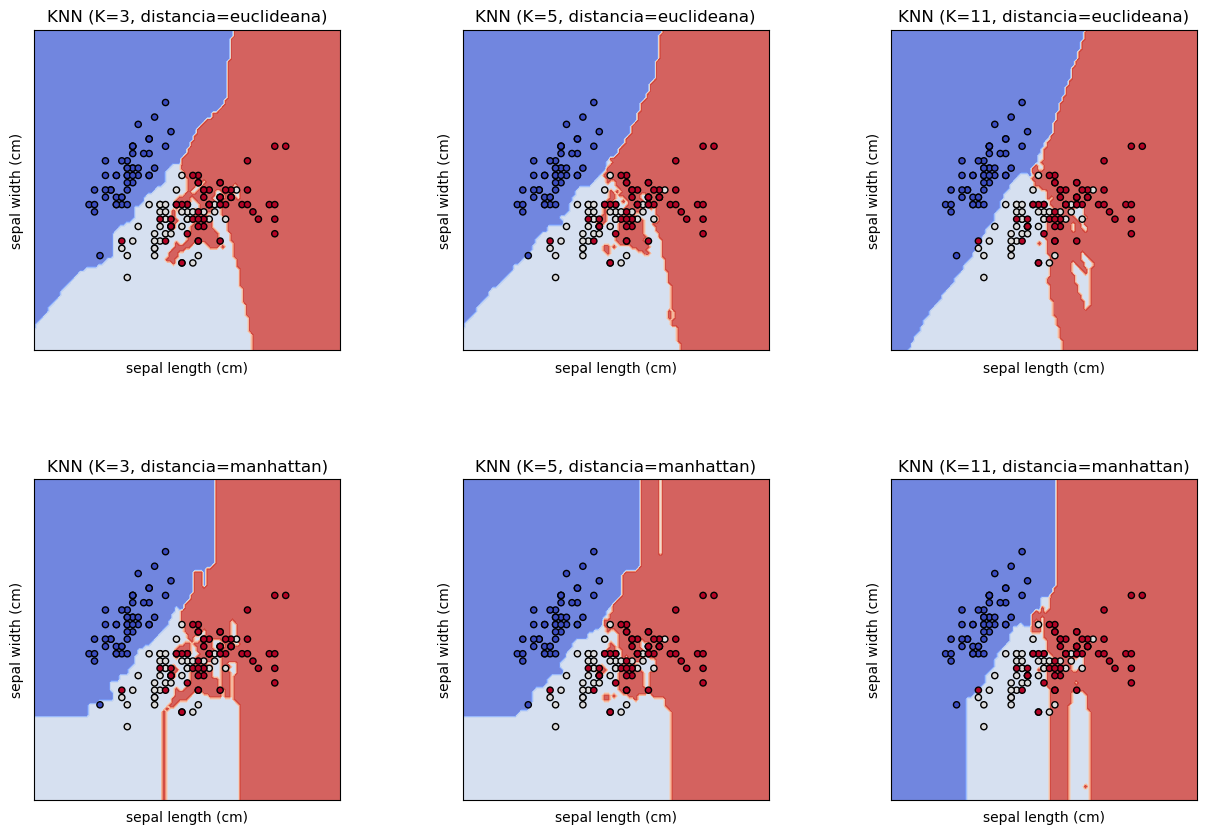

In [243]:
# Títulos para los gráficos
titles = (
    "KNN (K=3, distancia=euclideana)",
    "KNN (K=5, distancia=euclideana)",
    "KNN (K=11, distancia=euclideana)",
    "KNN (K=3, distancia=manhattan)",
    "KNN (K=5, distancia=manhattan)",
    "KNN (K=11, distancia=manhattan)",
)

# Grilla 2*2 para las imágenes
fig, sub = plt.subplots(2, 3, figsize=(15, 10))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X['sepal length (cm)'], X['sepal width (cm)']

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()